In [ ]:
# Importación de las librerías necesarias
from   sklearn.datasets   import make_gaussian_quantiles
import matplotlib.pyplot  as plt
import numpy              as np

Shape de las entradas     de la red: (1000, 2)
Shape de las predicciones de la red: (1000, 1)


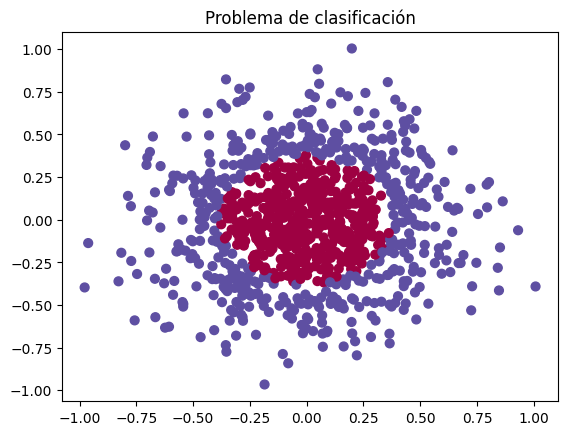

In [ ]:
# Creación del dataset
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=1000,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None)

X, Y = gaussian_quantiles

# Necesario para hacer el plot más cómodo
Y = Y[:,np.newaxis]

# Shapes de X e Y de 2 clases
print('Shape de las entradas     de la red:', X.shape)
print('Shape de las predicciones de la red:', Y.shape)

# Gráfico de dispersión (scatter plot), de la distribución de los datos
plt.title("Problema de clasificación")
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

In [ ]:
# Función de inicialización de parámetros
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [ ]:
# Función de activación Sigmoide
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

# Función de activación ReLU
def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

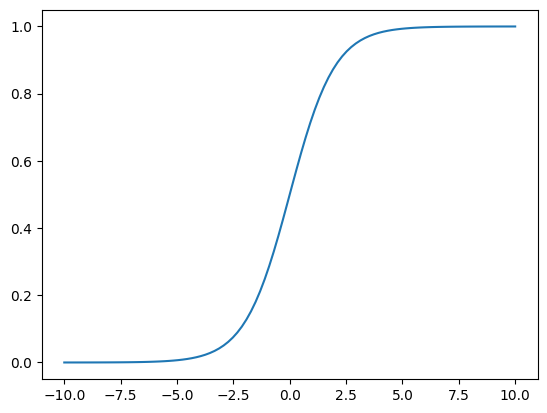

In [ ]:
# Generación Sigmoide
x = np.linspace(10,-10,100)
plt.plot(x,sigmoid(x))

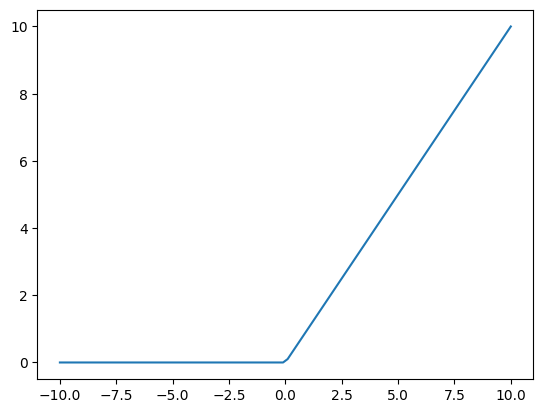

In [ ]:
# Generación ReLU
x = np.linspace(10,-10,100)
plt.plot(x,relu(x))

In [ ]:
# Función de entrenamiento
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data

    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
    # Backpropagation

        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])


        ## Gradinet Descent:

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

    return output

In [ ]:
# Entrenando la red
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))

0.2410047224391504
0.22430487046569617
0.21025771057032508
0.1948756027759184
0.18017288855034205
0.16947907819516564
0.16325900998198245
0.1596588211088129
0.15757944335195231
0.15607317894339698
0.15475524371785138
0.1530959120522587
0.1504038601079413
0.14619839051656866
0.1332820696208982
0.11201800808686173
0.0887341373193094
0.06692212277111317
0.0533231930199801
0.045279902929843144
0.03999304968219199
0.03625120919755892
0.03349979781837951
0.031375696626543166
0.029668209304321548
0.028287184223319998
0.027122526476115325
0.026106092611380374
0.025220787880647036
0.024446880682384976
0.023755651067352595
0.023146390004766745
0.022592930550068162
0.02208390869348274
0.021607912139363805
0.021167175987025874
0.02075097068749692
0.0203651605828166
0.020001049613181526
0.019652875528388018
0.019321184388912657
0.019004769565565027
0.01870435175311807
0.018417958522863168
0.01814942566918353
0.017893349530158937
0.017604768797799656
0.01733765986590284
0.017101016715707566
0.016844

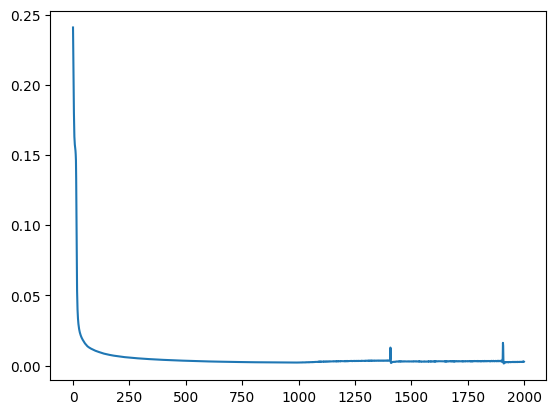

In [ ]:
plt.plot(errors)

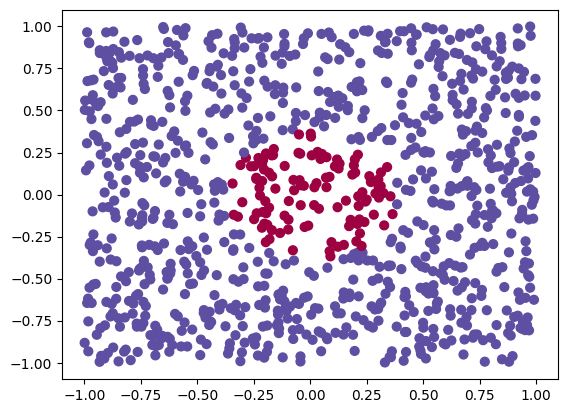

In [ ]:
# Probando sobre datos nuevos
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

y = np.where(y >= 0.5, 1, 0)

plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

<ipython-input-12-a794f6faadb4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)


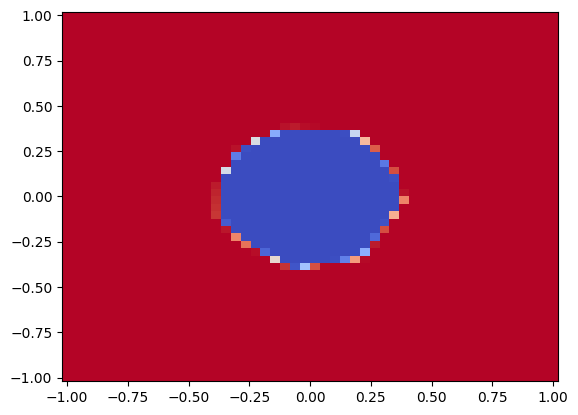

In [ ]:
# Malla de visualización
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))


for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')